# Geomechanical Injection Scenario Toolkit (GIST)

#Disclaimer
GIST aims to give the _gist_ of a wide range of potential scenarios and aid collective decision making when responding to seismicity.

The results of GIST are entirely dependent upon the inputs provided, which may be incomplete or inaccurate.

There are other potentially plausible inducement scenarios that are not considered, including fluid migration into the basement, 
out-of-zone poroelastic stressing, or hydraulic fracturing.

None of the individual models produced by GIST accurately represent what happens in the subsurface and cannot be credibly used 
to accurately assign liability or responsibility for seismicity.

"All models are wrong, but some are useful" - George Box, 1976

## Prerequisites

Assumes GIST_RunTemplate has completed.

##Install Dependencies
- geopandas
- geodatasets
- matplotlib
- folium
- mapclassify
- contextily

In [0]:
%restart_python

In [0]:
%run "/Workspace/_utils/Utility_Functions"

In [0]:
!pip install geopandas
!pip install geodatasets
!pip install folium matplotlib mapclassify contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 133.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 128.5 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

##Paths

In [0]:
# Paths
homePath='/Workspace/Users/bill.curry@exxonmobil.com/'
# Injection data path 
injPath=homePath+'injection/WeeklyRun/ScheduledOutput/'
# GIST library path
gistPath=homePath+'GIST/'

##Libraries

- os
- numpy
- scipy
- pandas
- matplotlib
- geopandas
- pyspark
- seaborn
- contextily
- gistPlots
- gistMC
- eqSQL


In [0]:
import sys
sys.path.append(gistPath)
sys.path.append(gistPath+'lib')

In [0]:
import numpy as np
import pandas as pd
import os
import gistMC as gi
import eqSQL as es
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import contextily as cx
import gistPlots as gp
import seaborn.objects as so

#Step 5 Prep

In [0]:
eventID='texnet2024oqfb'

In [0]:
runPath=gistPath+'/runs/'+eventID+'/'
EQDF=pd.read_csv(runPath+'/EQ.csv')
EQDF=geopandas.GeoDataFrame(EQDF, geometry=geopandas.points_from_xy(EQDF['Longitude'],EQDF['Latitude']), crs="EPSG:4326")

In [0]:
# Binary deep/shallow parameter
deepOrShallow='Deep'
runIntervalPath=runPath+deepOrShallow+'/'
updatedRunIntervalPath=runIntervalPath+'udpatedRun/'
forecastRunIntervalPath=runIntervalPath+'forecastRun/'
disposalPath=runIntervalPath+'updatedDisposal/'

In [0]:
allInZoneWellsDF=pd.read_csv(runIntervalPath+'updatedDisposal/allInZoneWells.csv')
#allOutOfZoneWellsDF=pd.read_csv(runIntervalPath+'updatedDisposal/allOutOfZoneWells.csv')
injDF=pd.read_csv(runIntervalPath+'updatedDisposal/inj.csv')

#5. Forecast

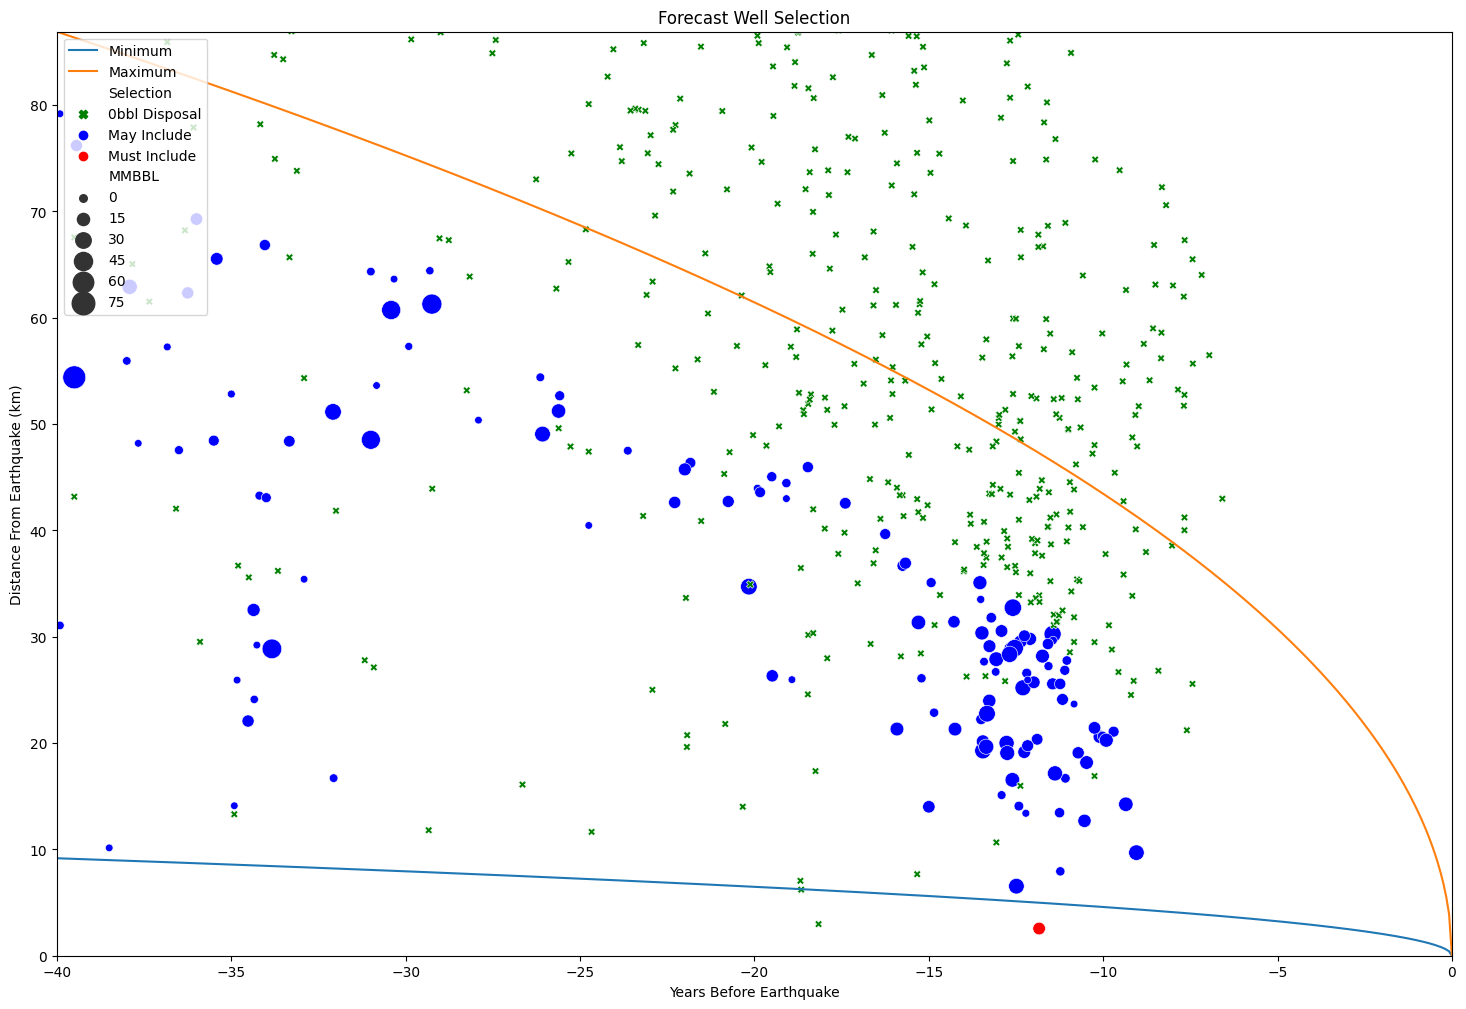

In [0]:
# Need to color newly-included wells

forecastRTDF=pd.read_csv(forecastRunIntervalPath+'RTDF.csv')
forecastWellsRTDF=pd.read_csv(forecastRunIntervalPath+'RTwells.csv')
gp.rMinusTPlotPP(forecastWellsRTDF,forecastRTDF,minYear=-40,sizeTuple=(30,300),title='Forecast Well Selection',zoom=True)

/home/spark-e1265ed5-c248-4953-b337-be/.ipykernel/43139/command-403523874047296-1184254219:2: DtypeWarning: Columns (2,3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  futureSummaryPPDF=pd.read_csv(forecastRunIntervalPath+'filteredScenarios.csv')


 disaggregationPlotPP: figure height is  9.0


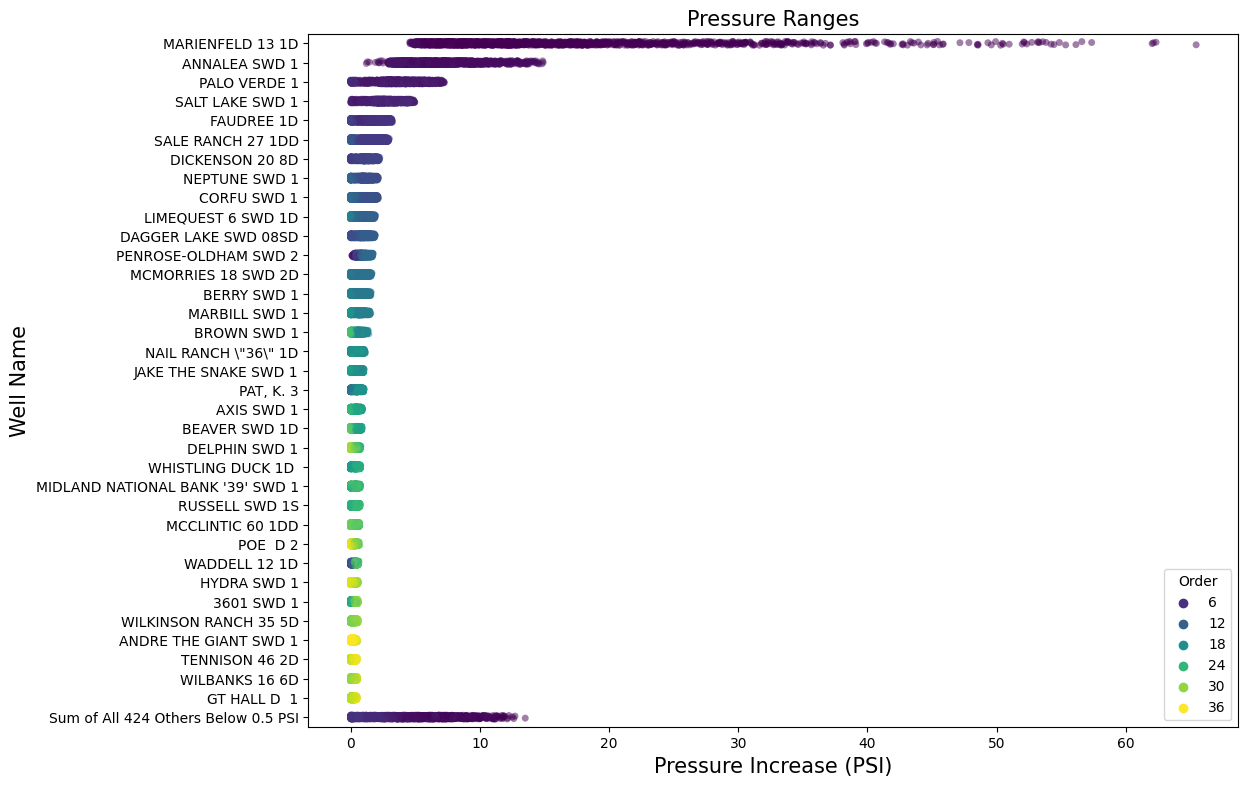

In [0]:
# Forecast future disaggregation
futureSummaryPPDF=pd.read_csv(forecastRunIntervalPath+'filteredScenarios.csv')
futureWellOrder=pd.read_csv(forecastRunIntervalPath+'forecastWellOrder.csv')['Name'].values
gp.disaggregationPlotPP(futureSummaryPPDF,futureWellOrder,deepOrShallow+'Forecast Pressure Ranges',verbose=2)

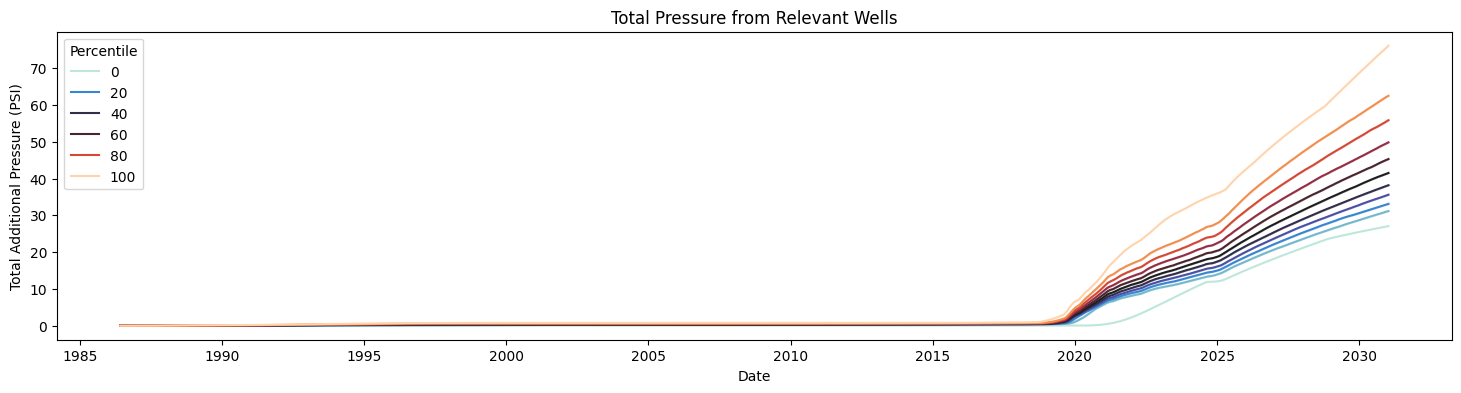

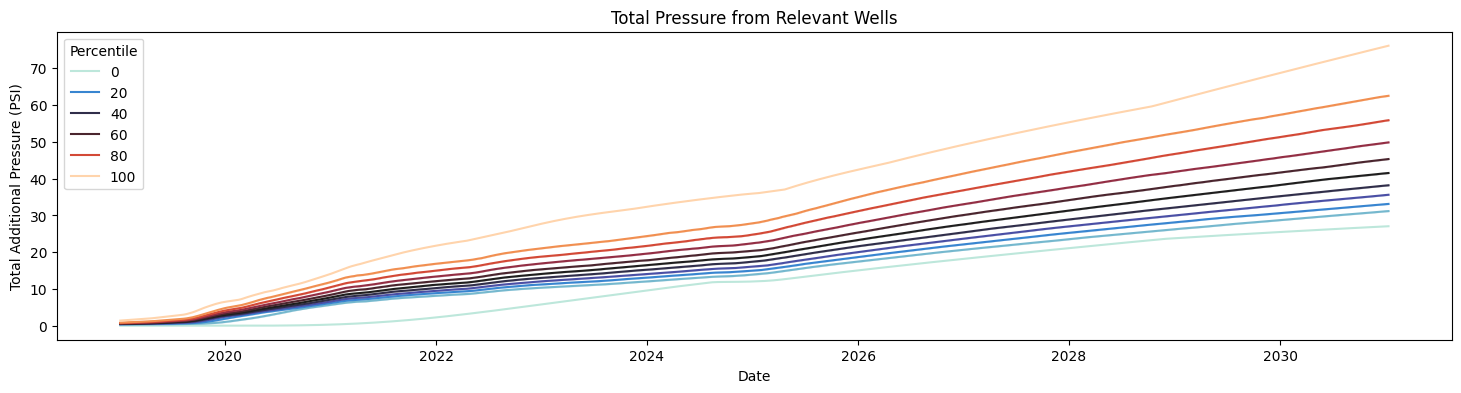

In [0]:
forecastTotalPPQuantilesDF=pd.read_csv(forecastRunIntervalPath+'forecastTotalPPQuantiles.csv')
gp.totalPressurePlot(forecastTotalPPQuantilesDF)
gp.totalPressurePlot(forecastTotalPPQuantilesDF,startDate=pd.to_datetime('2019-01-01'))

In [0]:
futureWellNames=futureWellOrder[:-1]
# Loop over wells of interest
for iw in range(len(futureWellNames)):
  futureWellInfoDF=pd.read_csv(forecastRunIntervalPath+'/perWell/well_'+str(iw)+'_WellInfo.csv')
  futureOneWellInjDF=pd.read_csv(forecastRunIntervalPath+'/perWell/well_'+str(iw)+'_Disposal.csv')
  futureOneWellQuantilesPPDF=pd.read_csv(forecastRunIntervalPath+'/perWell/well_'+str(iw)+'_PPQuantiles.csv')
  gp.disposalAndPressurePlot(futureWellInfoDF,futureOneWellInjDF,futureOneWellQuantilesPPDF,forecast=True)